# Fake News Classifier using the  Bag of Words and TF-IDF techniques

## Introduction

In this Jupyter Notebook, we will build a **Fake News Classifier** using machine learning techniques, employing both the TF-IDF and Bag of Words models. The goal is to differentiate between genuine news and fake news by analyzing their textual content.

The spread of misinformation and fake news on social media and online platforms has become a significant concern, making it crucial to develop an automated system to identify and flag potentially misleading information.

Let's proceed with loading the labeled dataset and implementing the TF-IDF and Bag of Words models to build an effective Fake News Classifier.

# importing the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
## Get the Independent Features
X=df.drop('label',axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
## Get the Dependent features
y=df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df=df.dropna()

In [11]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
messages=df.copy()

In [13]:
messages.reset_index(inplace=True)

In [14]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

# Data cleaning and preprocessing

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re 
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
print(corpus[:5])

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart', 'truth might get fire', 'civilian kill singl us airstrik identifi', 'iranian woman jail fiction unpublish stori woman stone death adulteri']


# Applying Countvectorizer
# Creating the Bag of Words model

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [19]:
X.shape

(18285, 5000)

In [20]:
y=messages['label']

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [22]:
feature_names = cv.get_feature_names_out()
print(feature_names[:20])

['abandon' 'abc' 'abc news' 'abduct' 'abe' 'abedin' 'abl' 'abort' 'abroad'
 'absolut' 'abstain' 'absurd' 'abus' 'abus new' 'abus new york' 'academi'
 'accept' 'access' 'access pipelin' 'access pipelin protest']


In [23]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
feature_names = cv.get_feature_names_out()
count_df = pd.DataFrame(X_train, columns=feature_names)

In [25]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [29]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


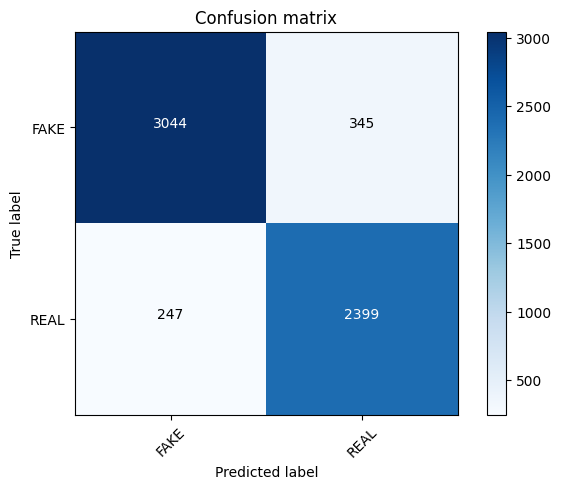

In [30]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

In [32]:
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.920
Confusion matrix, without normalization


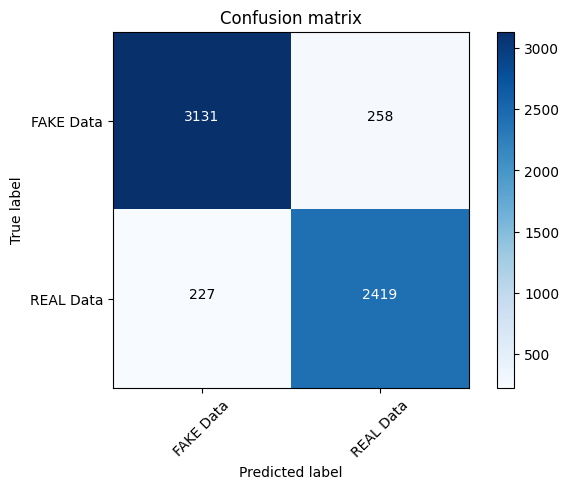

In [34]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [35]:
classifier=MultinomialNB(alpha=0.1)

In [36]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\GhaithAbcha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\GhaithAbcha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [51]:
# Access the feature log probabilities
feature_log_probs = classifier.feature_log_prob_

# Get the feature names from the CountVectorizer
feature_names = cv.get_feature_names_out()

In [52]:
feature_names

array(['abandon', 'abc', 'abc news', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

In [53]:
# Pair the feature names with their log probabilities
feature_names_log_probs = list(zip(feature_names, feature_log_probs[1]))  # Use the feature_log_probs[1] for the "real" class

# Sort the feature names by their log probabilities in descending order (most real)
most_real_features = sorted(feature_names_log_probs, key=lambda x: x[1], reverse=True)[:20]

print("Most Real Features:")
for feature, log_prob in most_real_features:
    print(f"{feature}: {log_prob}")

Most Real Features:
trump: -4.000149156604985
hillari: -4.287872694443541
clinton: -4.396389621061519
elect: -4.899969726208735
new: -5.176598600897756
comment: -5.234730366348767
video: -5.273968180973631
war: -5.3868167681180115
us: -5.396821854078974
hillari clinton: -5.412019714988405
fbi: -5.417137433425386
vote: -5.48068448454208
email: -5.566255475855405
world: -5.578238842742501
obama: -5.634015380199913
donald: -5.734501455772904
donald trump: -5.763095255139644
russia: -5.785090276725191
day: -5.846224665218559
america: -5.862110622807369


In [68]:
### Most fake
# Pair the feature names with their log probabilities for the "fake" class (index 0)
feature_names_log_probs_fake = list(zip(feature_names, feature_log_probs[0]))

# Sort the feature names by their log probabilities in ascending order (most important for "fake" class)
most_fake_features = sorted(feature_names_log_probs_fake, key=lambda x: x[1])[:20]

print("Most Fake Features:")
for feature, log_prob in most_fake_features:
    print(f"{feature}: {log_prob}")

Most Fake Features:
access pipelin protest: -11.458457546147459
acknowledg emf: -11.458457546147459
acknowledg emf damag: -11.458457546147459
acquit: -11.458457546147459
acr: -11.458457546147459
adhd: -11.458457546147459
airstrik kill: -11.458457546147459
al nusra: -11.458457546147459
america last: -11.458457546147459
america vote: -11.458457546147459
american concern: -11.458457546147459
american concern elect: -11.458457546147459
american peopl defeat: -11.458457546147459
aqsa: -11.458457546147459
arabian: -11.458457546147459
ariel noyola: -11.458457546147459
ariel noyola rodr: -11.458457546147459
ask question: -11.458457546147459
auf: -11.458457546147459
avail: -11.458457546147459


# TFidf Vectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [70]:
X.shape

(18285, 5000)

In [71]:
y=messages['label']

# Divide the dataset into Train and Test

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [75]:
tfidf_v.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [76]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [78]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [79]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
import matplotlib.pyplot as plt

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [82]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [83]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.881
Confusion matrix, without normalization


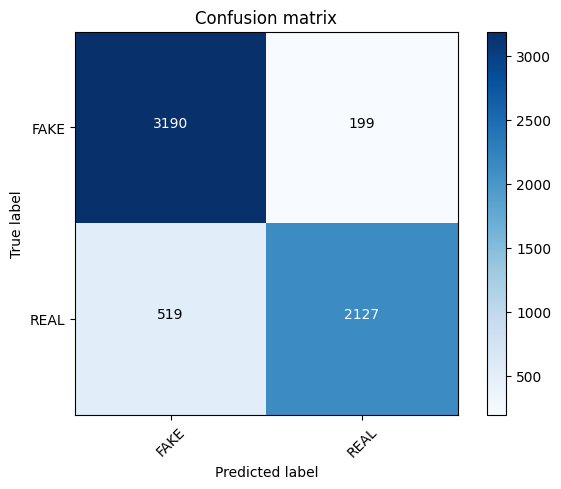

In [84]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [85]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8810273405136703

In [86]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

In [88]:
from sklearn.linear_model import PassiveAggressiveClassifier
# Create the PassiveAggressiveClassifier with the 'max_iter' parameter
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.917
Confusion matrix, without normalization


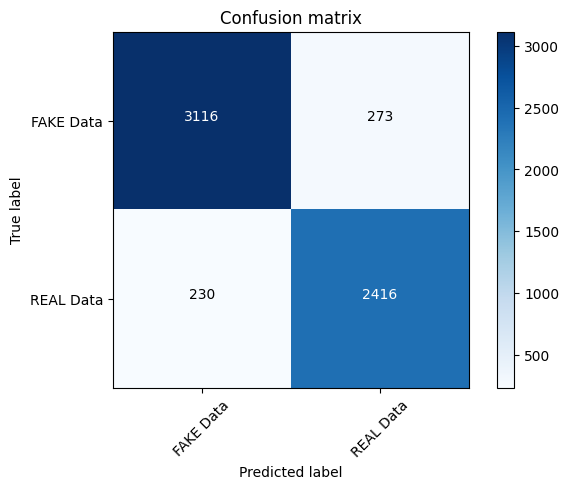

In [89]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Multinomial Classifier with Hyperparameter

In [90]:
classifier=MultinomialNB(alpha=0.1)


In [91]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\GhaithAbcha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\GhaithAbcha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8662800331400166
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [92]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [93]:
# Pair the feature names with their log probabilities
feature_names_log_probs = list(zip(feature_names, feature_log_probs[1]))  # Use the feature_log_probs[1] for the "real" class

# Sort the feature names by their log probabilities in descending order (most real)
most_real_features = sorted(feature_names_log_probs, key=lambda x: x[1], reverse=True)[:20]

print("Most Real Features:")
for feature, log_prob in most_real_features:
    print(f"{feature}: {log_prob}")

Most Real Features:
trump: -4.000149156604985
hillari: -4.287872694443541
clinton: -4.396389621061519
elect: -4.899969726208735
new: -5.176598600897756
comment: -5.234730366348767
video: -5.273968180973631
war: -5.3868167681180115
us: -5.396821854078974
hillari clinton: -5.412019714988405
fbi: -5.417137433425386
vote: -5.48068448454208
email: -5.566255475855405
world: -5.578238842742501
obama: -5.634015380199913
donald: -5.734501455772904
donald trump: -5.763095255139644
russia: -5.785090276725191
day: -5.846224665218559
america: -5.862110622807369


In [96]:
# Pair the feature names with their log probabilities for the "fake" class
fake_feature_names_log_probs = list(zip(feature_names, feature_log_probs[0]))

# Sort the feature names by their log probabilities in descending order (most fake)
most_fake_features = sorted(fake_feature_names_log_probs, key=lambda x: x[1], reverse=True)[:20]

print("Most Fake Features:")
for feature, log_prob in most_fake_features:
    print(f"{feature}: {log_prob}")


Most Fake Features:
new: -2.9468577463990755
time: -2.994219848520549
york: -3.000566240637532
new york: -3.0008020674474167
new york time: -3.014815217142134
york time: -3.014815217142134
breitbart: -3.9648310157438633
trump: -4.004573851696944
donald: -5.2756841712452855
donald trump: -5.282590276041697
say: -5.755045510465673
obama: -5.992274458590198
clinton: -6.016039835625665
presid: -6.106599412671392
state: -6.122523316028115
report: -6.177512429323892
attack: -6.188882648465076
hous: -6.253840544739848
brief: -6.259960514881633
hillari: -6.316793989644799


## HashingVectorizer

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have 'corpus' containing your text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a sparse format with non-negative values
X = X_tfidf.toarray()

# Now 'X' contains the transformed feature matrix with non-negative values as a NumPy array


In [103]:
X.shape

(18285, 5000)

In [104]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Divide the dataset into Train and Test

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.862
Confusion matrix, without normalization


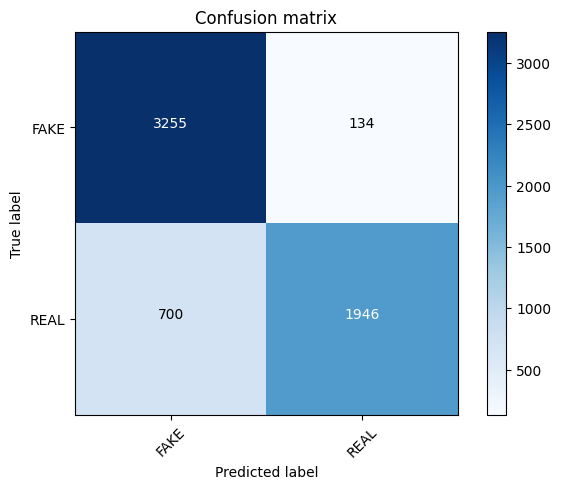

In [106]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])